In [3]:
import requests
r = requests.get('https://www.lesjeudis.com/recherche?pg=')

In [7]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(r.text,'html.parser')

In [17]:
# On imprime le scrapping sous forme lisible
print(soup.prettify())

<!DOCTYPE html>
<html lang="fr-FR">
 <head>
  <script>
   window.dataLayer = window.dataLayer || [];
  window.dataLayer.push({
  	"currentVer": "Rails",
  	"is_internal": false,
  	"CBPageType": "JRP",
  	"is_jdp": false,
  	"site_id": "cbnsv",
  	"user_status": "Unknown",
  	"jrp_result_count": 5591,
  	"browser_id": "389b415d38c606fc4b1304e44a139a21"
  });
  </script>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-M7G32X');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"6241f0a1a5","applicatio

In [29]:
# On spécifie quelle partie on souhaite retenir
result=soup.find_all('div', attrs={'class':'job-info'})

In [31]:
# Ici on affiche le titre du poste de la première annonce
print(result[0].find('a').text)


Architecte / Ingénieur avant-vente Infrastructure IP & Sécurité H/F



In [33]:
# Mise en forme d'une dataframe
# On va créer des listes pour chaque colonne que l'on souhaite obtenir
Poste = []
Entreprise = []
Tags = []

# Afin de scrapper plusieurs pages,
# on divise l'url en deux variables

debut_url = 'https://www.lesjeudis.com/recherche?pg='
fin_url = '&q=data+analyst'

# Création d'une boucle pour scrapper chaque page
for page in range(10):
    url = f'{debut_url}{page}{fin_url}'
    r = requests.get(url)
    
    soup = BeautifulSoup(r.text, 'html.parser')
    # On va chercher les titre de poste 
    job_title= soup.find_all('div', attrs={'class':'job-info'})
    
    # On incorpore les titres dans la liste Poste
    for i in job_title:
        Poste.append(i.find('a').text.strip("\n"))
        
    # Même chose pour le nom de l'entreprise
    company = soup.find_all('div', attrs={'class':'snapshot'})
    
    for i in company:
        Entreprise.append(i.find('a').text.strip("\n"))
    
    # Même chose pour les tags 
    tags= soup.find_all('div', attrs={'class':'tags'})
    
    for i in tags:
        if tags is not None:
            Tags.append(i.text.strip("\n"))

In [34]:
# Mainteant que les liste sont remplies nous pouvons importer Pandas pour créer le Dataframe
import pandas as pd


In [88]:
datajobs = pd.DataFrame({'Entreprise':Entreprise,'Poste':Poste, 'Tags':Tags})

In [89]:
datajobs.head()

,Entreprise,Poste,Tags
0,La Redoute,Data Analyst,e-commerce\n\ndata management\n\nmarketing\n\n...
1,Temenis Conseil,Data Analyst F/H,t-sql\n\nsql\n\nbig data\n\nmicrosoft\n\nsystème
2,Hays France,Data analyst H/F,linux\n\npostgresql\n\nruby\n\nperl\n\nlangage
3,Expectra,DATA ANALYST (F/H),marketing\n\ncrm\n\nweb\n\noptimisation\n\noutils
4,HR DNA,DATA ANALYSTE MARKETING ou DATA SCIENTIST,marketing\n\noutils\n\nréseaux\n\nc++\n\nsupport


In [91]:
# On note que les tags sont peu lisibles, nous allons alors les séparer en plusieurs colonnes
datajobs[['Tag1','Tag2','Tag3','Tag4','Tags5']] = datajobs.Tags.str.split('\n\n',expand=True)


In [39]:
datajobs.head()

,Entreprise,Poste,Tags,Tag1,Tag2,Tag3,Tag4,Tag5
0,La Redoute,Data Analyst,e-commerce\n\ndata management\n\nmarketing\n\n...,e-commerce,data management,marketing,sql,agile
1,Temenis Conseil,Data Analyst F/H,t-sql\n\nsql\n\nbig data\n\nmicrosoft\n\nsystème,t-sql,sql,big data,microsoft,système
2,Hays France,Data analyst H/F,linux\n\npostgresql\n\nruby\n\nperl\n\nlangage,linux,postgresql,ruby,perl,langage
3,Expectra,DATA ANALYST (F/H),marketing\n\ncrm\n\nweb\n\noptimisation\n\noutils,marketing,crm,web,optimisation,outils
4,HR DNA,DATA ANALYSTE MARKETING ou DATA SCIENTIST,marketing\n\noutils\n\nréseaux\n\nc++\n\nsupport,marketing,outils,réseaux,c++,support


In [92]:
dfjobs=datajobs

In [43]:
# On drop la colonne Tags
dfjobs.drop(["Tags"],axis=1, inplace=True)

In [44]:
# Nous avons un dataframe plus lisible 
dfjobs.head()

,Entreprise,Poste,Tag1,Tag2,Tag3,Tag4,Tag5
0,La Redoute,Data Analyst,e-commerce,data management,marketing,sql,agile
1,Temenis Conseil,Data Analyst F/H,t-sql,sql,big data,microsoft,système
2,Hays France,Data analyst H/F,linux,postgresql,ruby,perl,langage
3,Expectra,DATA ANALYST (F/H),marketing,crm,web,optimisation,outils
4,HR DNA,DATA ANALYSTE MARKETING ou DATA SCIENTIST,marketing,outils,réseaux,c++,support


In [46]:
# On import les modules pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# On stock le total d'occurences de chaque tags
tag1_list= dfjobs['Tag1'].value_counts()
tag2_list= dfjobs['Tag2'].value_counts()
tag3_list= dfjobs['Tag3'].value_counts()
tag4_list= dfjobs['Tag4'].value_counts()

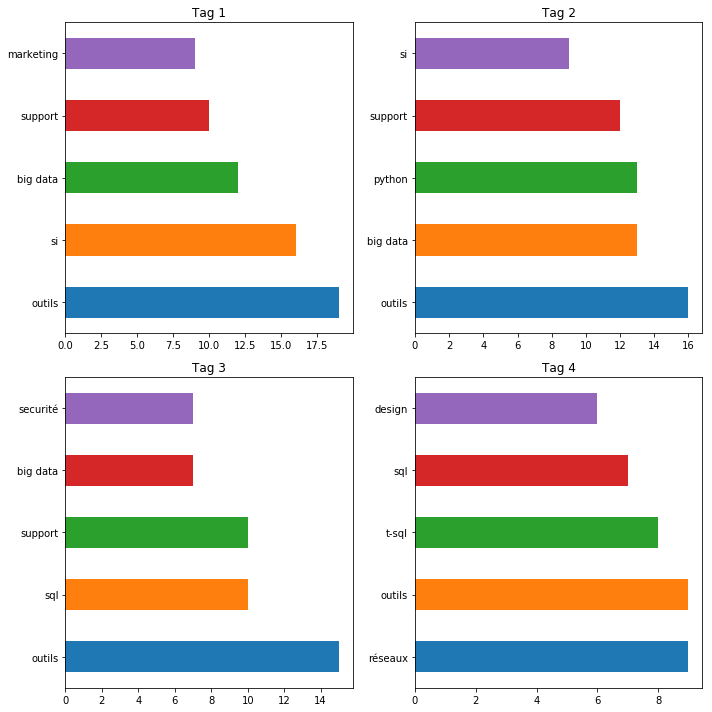

In [189]:
# On réalise une figure qui affiche les 5 valeurs les plus récurrentes dans les 4 tag
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
tag1_list.head().plot(kind='barh',title="Tag 1")
plt.subplot(2,2,2)
tag2_list.head().plot(kind='barh',title="Tag 2")
plt.subplot(2,2,3)
tag3_list.head().plot(kind='barh',title="Tag 3")
plt.subplot(2,2,4)
tag4_list.head().plot(kind='barh',title="Tag 4")
plt.tight_layout()

In [204]:
dfx =dfjobs['Tag1'].value_counts().head(10)


In [206]:
dfx

outils       19
si           16
big data     12
support      10
marketing     9
digital       8
cloud         8
sql           6
t-sql         6
sécurité      5
Name: Tag1, dtype: int64

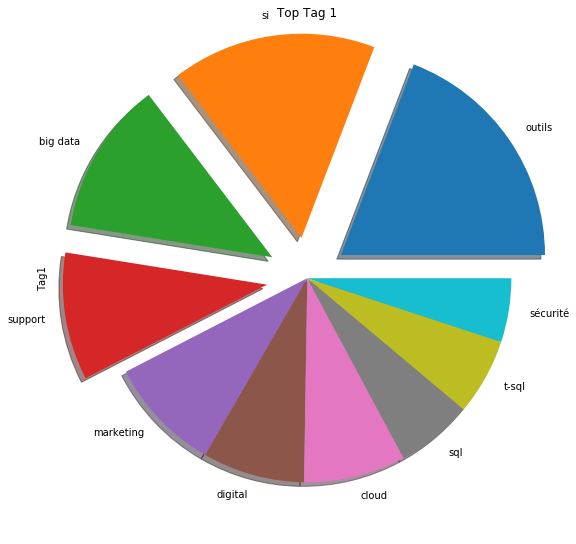

In [225]:
plt.figure(figsize = (8, 8))
plt.subplot()
dfx.plot(kind='pie',explode = [0.2,0.2,0.2,0.2,0,0,0,0,0,0], title="Top Tag 1", shadow= 1)
plt.tight_layout()